# Principal Component Analysis with Cancer Data

In [3]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [7]:
# Importing Data file
data = pd.read_csv('breast-cancer-wisconsin.data.txt')
data.columns=['Sample code number', 'Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [8]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [9]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [10]:
data.shape

(698, 11)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
Sample code number             698 non-null int64
Clump Thickness                698 non-null int64
Uniformity of Cell Size        698 non-null int64
Uniformity of Cell Shape       698 non-null int64
Marginal Adhesion              698 non-null int64
Single Epithelial Cell Size    698 non-null int64
Bare Nuclei                    698 non-null object
Bland Chromatin                698 non-null int64
Normal Nucleoli                698 non-null int64
Mitoses                        698 non-null int64
Class                          698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sample code number,698.0,1.071807e+06,617532.274029,61634.0,870258.25,1171710.0,1238354.0,13454352.0
Clump Thickness,698.0,4.416905e+00,2.817673,1.0,2.00,4.0,6.0,10.0
Uniformity of Cell Size,698.0,3.137536e+00,3.052575,1.0,1.00,1.0,5.0,10.0
Uniformity of Cell Shape,698.0,3.210602e+00,2.972867,1.0,1.00,1.0,5.0,10.0
Marginal Adhesion,698.0,2.809456e+00,2.856606,1.0,1.00,1.0,4.0,10.0
Single Epithelial Cell Size,698.0,3.217765e+00,2.215408,1.0,2.00,2.0,4.0,10.0
Bland Chromatin,698.0,3.438395e+00,2.440056,1.0,2.00,3.0,5.0,10.0
Normal Nucleoli,698.0,2.869628e+00,3.055004,1.0,1.00,1.0,4.0,10.0
Mitoses,698.0,1.590258e+00,1.716162,1.0,1.00,1.0,1.0,10.0
Class,698.0,2.690544e+00,0.951596,2.0,2.00,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [ ]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [24]:
dataset = data.replace('?', np.NAN)
dataset = dataset.apply(lambda x: x.fillna(x.median()),axis=0)

In [ ]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [25]:
dataset['Bare Nuclei'].value_counts()

1      401
10     132
2       30
5       30
3       28
8       21
4       19
1.0     16
9        9
7        8
6        4
Name: Bare Nuclei, dtype: int64

In [26]:
# converting the column from object 'Bare Nuclei'/ string type to int
dataset['Bare Nuclei'] = dataset['Bare Nuclei'].astype('int64')  

In [27]:
dataset['Bare Nuclei'].value_counts()

1     417
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [28]:
# Check for correlation of variable

In [46]:
df = dataset.drop(['Sample code number'],axis=1)

In [47]:
corr = df.corr()

In [42]:
corr

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.645366,0.655089,0.486699,0.522108,0.590430,0.558511,0.536176,0.350176,0.716509
Uniformity of Cell Size,0.645366,1.000000,0.906814,0.705397,0.751674,0.686457,0.755824,0.722699,0.458548,0.817772
Uniformity of Cell Shape,0.655089,0.906814,1.000000,0.682871,0.719524,0.707261,0.736066,0.719272,0.438756,0.818794
Marginal Adhesion,0.486699,0.705397,0.682871,1.000000,0.599402,0.666765,0.666759,0.603132,0.417476,0.696605
Single Epithelial Cell Size,0.522108,0.751674,0.719524,0.599402,1.000000,0.583484,0.616108,0.628704,0.478975,0.682618
Bare Nuclei,0.590430,0.686457,0.707261,0.666765,0.583484,1.000000,0.674281,0.574524,0.342203,0.818839
Bland Chromatin,0.558511,0.755824,0.736066,0.666759,0.616108,0.674281,1.000000,0.665914,0.344118,0.756732
Normal Nucleoli,0.536176,0.722699,0.719272,0.603132,0.628704,0.574524,0.665914,1.000000,0.428185,0.712067
Mitoses,0.350176,0.458548,0.438756,0.417476,0.478975,0.342203,0.344118,0.428185,1.000000,0.423008
Class,0.716509,0.817772,0.818794,0.696605,0.682618,0.818839,0.756732,0.712067,0.423008,1.000000


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [1]:
#Let us check for pair plots

C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


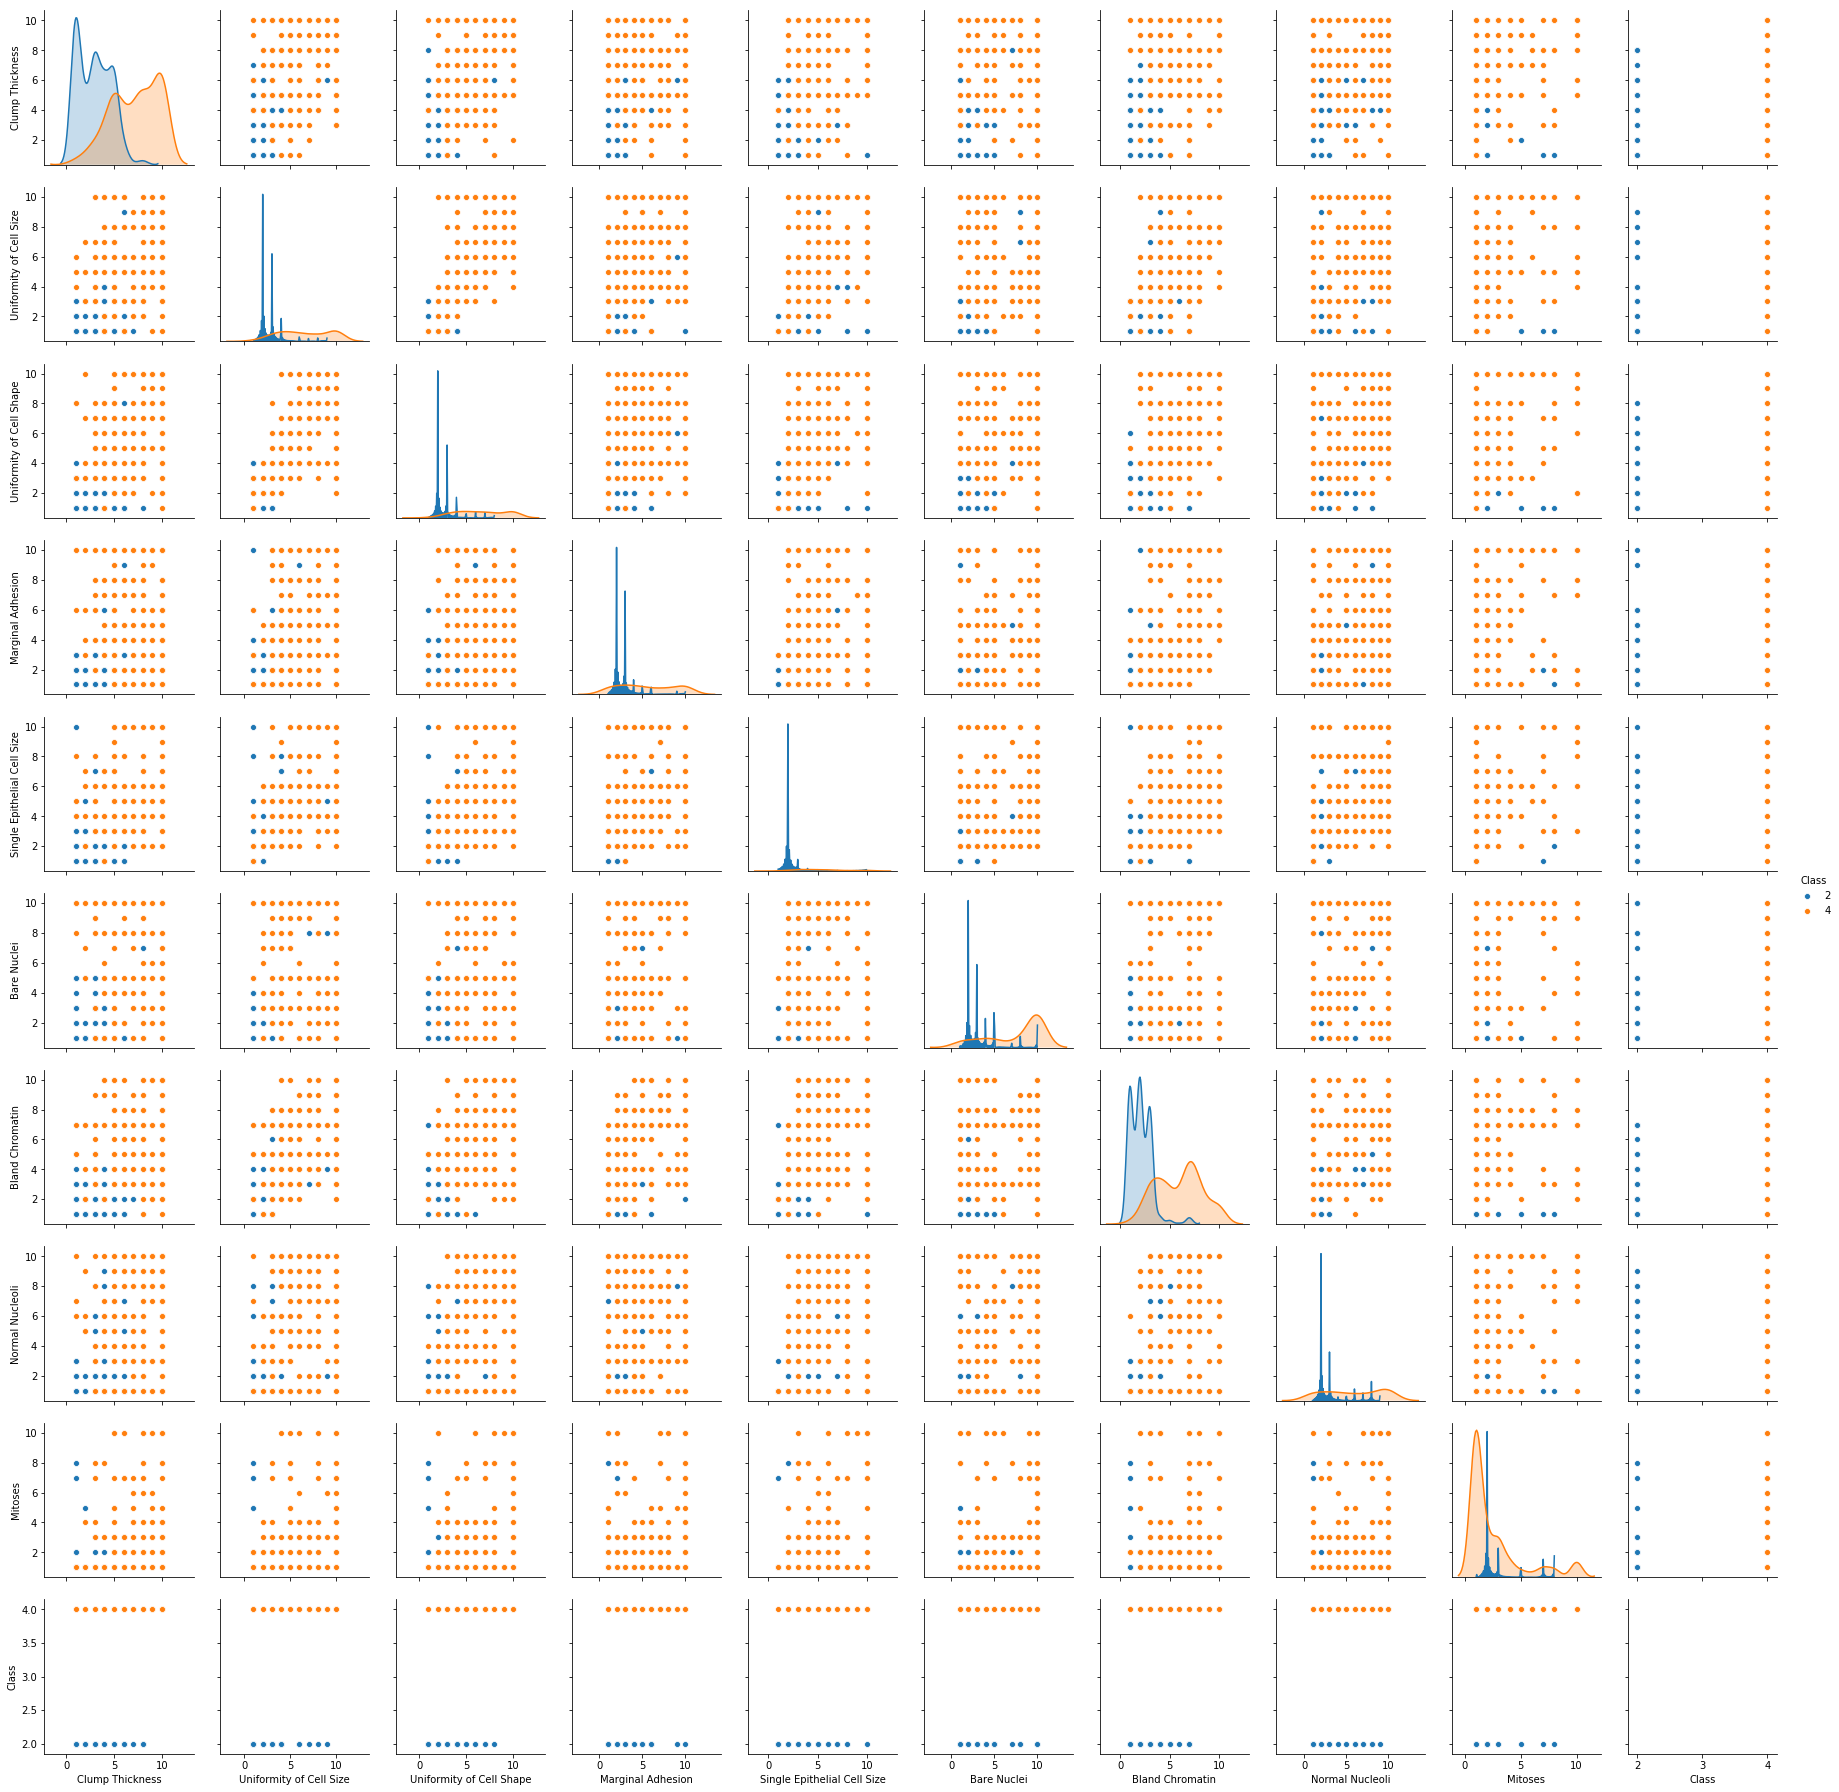

In [48]:
sns.pairplot(df, diag_kind = "kde", hue = "Class")

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

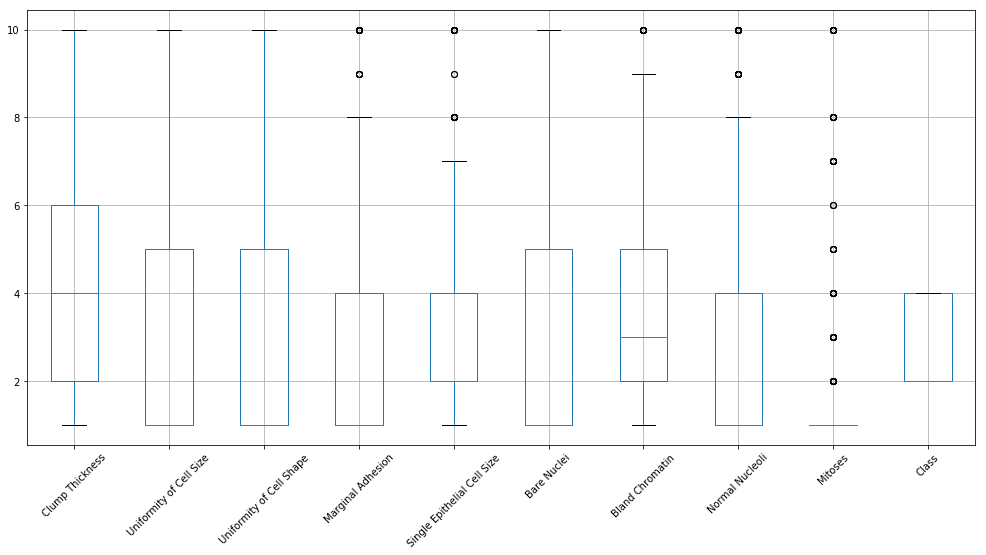

In [49]:
boxplot = df.boxplot(figsize=(17,8), rot =45)

In [53]:
df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [62]:
pd.crosstab(df["Marginal Adhesion"],df["Class"])
pd.crosstab(df["Single Epithelial Cell Size"],df["Class"])
pd.crosstab(df["Bland Chromatin"],df["Class"])
pd.crosstab(df["Normal Nucleoli"],df["Class"])
pd.crosstab(df["Mitoses"],df["Class"])

Class,2,4
Marginal Adhesion,,
1,374,32
2,37,21
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,362,23
3,29,43
4,7,41
5,5,34
6,2,39
7,3,9
8,2,19
9,0,2


Class,2,4
Bland Chromatin,,
1,150,2
2,159,7
3,128,36
4,8,32
5,4,30
6,1,9
7,7,66
8,0,28
9,0,11


Class,2,4
Normal Nucleoli,,
1,401,41
2,30,6
3,12,32
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


Class,2,4
Mitoses,,
1,444,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [63]:
df["Mitoses"] = np.where(df["Mitoses"] >2, 3, df["Mitoses"])

In [64]:
pd.crosstab(df["Mitoses"],df["Class"])

Class,2,4
Mitoses,,
1,444,134
2,8,27
3,5,80


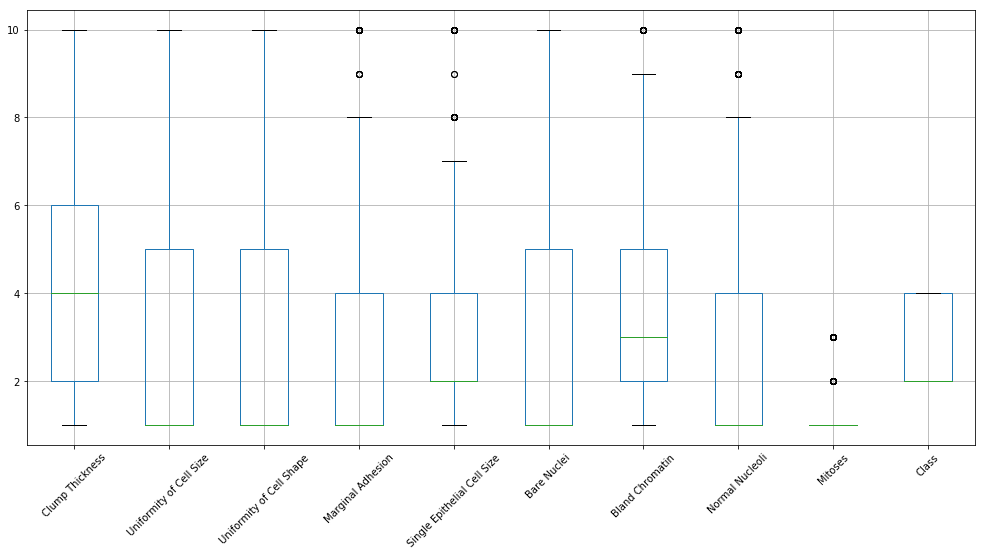

In [65]:
boxplot = df.boxplot(figsize=(17,8), rot =45)

# Q6 Create a covariance matrix for identifying Principal components

In [2]:
# PCA
# Step 1 - Create covariance matrix


In [87]:
df = df.transpose()

In [88]:
dfcov = df.cov()

In [89]:
dfcov

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,7.939283,5.550900,5.487396,3.917430,3.259154,6.027860,3.839924,4.615407,0.807079,1.921164
Uniformity of Cell Size,5.550900,9.318216,8.229243,6.151065,5.083349,7.592486,5.629719,6.739621,1.049936,2.375477
Uniformity of Cell Shape,5.487396,8.229243,8.837936,5.799154,4.738864,7.618327,5.339391,6.532518,0.963883,2.316341
Marginal Adhesion,3.917430,6.151065,5.799154,8.160197,3.793347,6.901243,4.647499,5.263501,0.908266,1.893605
Single Epithelial Cell Size,3.259154,5.083349,4.738864,3.793347,4.908034,4.683679,3.330508,4.255117,0.736525,1.439078
Bare Nuclei,6.027860,7.592486,7.618327,6.901243,4.683679,13.128307,5.961361,6.359523,1.102663,2.823291
Bland Chromatin,3.839924,5.629719,5.339391,4.647499,3.330508,5.961361,5.953875,4.963980,0.654417,1.757092
Normal Nucleoli,4.615407,6.739621,6.532518,5.263501,4.255117,6.359523,4.963980,9.333050,0.998173,2.070071
Mitoses,0.807079,1.049936,0.963883,0.908266,0.736525,1.102663,0.654417,0.998173,0.451639,0.333484
Class,1.921164,2.375477,2.316341,1.893605,1.439078,2.823291,1.757092,2.070071,0.333484,0.905535


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [92]:
w, v = np.linalg.eig(dfcov)

In [93]:
w, v

(array([48.76557224,  5.10756595,  4.29048536,  3.08636515,  2.71735111,
         1.99747099,  1.72860489,  0.14191674,  0.29442894,  0.80631137]),
 array([[ 2.98593385e-01, -5.26561546e-02,  8.47012619e-01,
         -4.48004457e-02,  4.20280050e-01,  3.21354126e-02,
         -7.59504007e-02,  6.18376516e-02,  3.70210328e-02,
          9.70660307e-04],
        [ 4.03328467e-01,  2.41268073e-01,  1.86528206e-02,
         -3.26173972e-01, -2.96281018e-01, -5.01250738e-02,
          2.28068558e-01,  4.17075711e-02,  5.48929154e-02,
          7.24786515e-01],
        [ 3.91417908e-01,  1.81489327e-01,  6.85057494e-02,
         -2.41835204e-01, -3.36962870e-01, -4.84787605e-02,
          4.34678086e-01,  3.39512241e-02, -3.89097894e-02,
         -6.65710508e-01],
        [ 3.30395966e-01, -1.05534743e-01, -4.83294860e-01,
         -3.77303093e-01,  6.87283960e-01,  1.38357000e-01,
          9.11030327e-02,  6.56849402e-03,  4.06234038e-02,
         -4.76897045e-02],
        [ 2.48498141e-01

In [114]:
#the above values in array are pc1, pc2, pc3, ... 
# convert them to dataframe, and assign columns (as as df)

# Q8 Find variance and cumulative variance by each eigen vector

In [94]:
w.sum()

68.9360727308605

In [95]:
w*100/w.sum()

array([70.74028198,  7.40913392,  6.22386103,  4.47714096,  3.94184206,
        2.89757004,  2.50754767,  0.20586716,  0.42710431,  1.16965087])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [96]:
from sklearn.decomposition import PCA

In [103]:
df = df.drop(['Class'],axis=1)

In [104]:
pca=PCA(n_components=3) 
pca.fit(df) 
X_pca=pca.transform(df) 
#let's check the shape of X_pca array
print("shape of X_pca", X_pca.shape)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

shape of X_pca (698, 3)


# Q10 Find correlation between components and features

([<matplotlib.axis.YTick at 0x2e59daf8cf8>,
 <a list of 3 Text yticklabel objects>)

([<matplotlib.axis.XTick at 0x2e59daf8470>,
 <a list of 9 Text xticklabel objects>)

C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


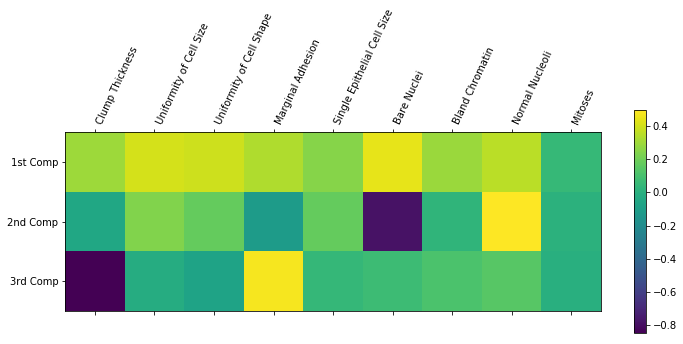

In [105]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [4]:
# Importing Data file
jd = pd.read_csv('jokes.csv')

In [5]:
jd.shape
jd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [6]:
jd.describe()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
count,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,...,24983.000000,24983.00000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000
mean,72.467478,34.401435,27.094089,33.263717,36.244936,0.427236,19.342119,-0.401803,-0.616110,36.228421,...,61.462019,60.27989,60.421701,59.059621,58.749897,58.541104,58.017246,57.061650,55.753357,60.138090
std,21.859600,46.707059,44.228006,46.747535,48.812967,5.472657,37.860770,5.741616,5.008894,48.228364,...,47.335405,47.94644,47.359847,48.196204,48.310728,48.130562,48.164681,48.717455,49.237139,47.913531
min,36.000000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.95000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,53.000000,-0.150000,-2.180000,-1.145000,-3.350000,-3.690000,-0.390000,-5.290000,-4.610000,-1.775000,...,4.760000,3.59000,4.610000,3.250000,3.160000,3.300000,3.590000,2.670000,1.335000,3.930000
50%,72.000000,5.050000,3.690000,4.660000,3.450000,1.120000,3.540000,-0.050000,-0.290000,4.030000,...,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
75%,100.000000,99.000000,99.000000,99.000000,99.000000,4.470000,8.010000,3.930000,3.060000,99.000000,...,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
max,100.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [7]:
jd.head

<bound method NDFrame.head of        NumJokes  Joke1  Joke2  Joke3  Joke4  Joke5  Joke6  Joke7  Joke8  \
0            74  -7.82   8.79  -9.66  -8.16  -7.52  -8.50  -9.85   4.17   
1           100   4.08  -0.29   6.36   4.37  -2.38  -9.66  -0.73  -5.34   
2            49  99.00  99.00  99.00  99.00   9.03   9.27   9.03   9.27   
3            48  99.00   8.35  99.00  99.00   1.80   8.16  -2.82   6.21   
4            91   8.50   4.61  -4.17  -5.39   1.36   1.60   7.04   4.61   
5           100  -6.17  -3.54   0.44  -8.50  -7.09  -4.32  -8.69  -0.87   
6            47  99.00  99.00  99.00  99.00   8.59  -9.85   7.72   8.79   
7           100   6.84   3.16   9.17  -6.21  -8.16  -1.70   9.27   1.41   
8           100  -3.79  -3.54  -9.42  -6.89  -8.74  -0.29  -5.29  -8.93   
9            72   3.01   5.15   5.15   3.01   6.41   5.15   8.93   2.52   
10           36  -2.91   4.08  99.00  99.00  -5.73  99.00   2.48  -5.29   
11          100   1.31   1.80   2.57  -2.38   0.73   0.73  -0.97   5.0

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [8]:
ratings = jd.iloc[:200]

In [9]:
ratings.shape

(200, 101)

# Q13 Change the column indices from 0 to 99

# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [10]:
ratings.replace(99.00, 0)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ratings_diff = scaler.fit(ratings)

C:\Users\VKE\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [13]:
print(ratings_diff)

StandardScaler(copy=True, with_mean=True, with_std=True)


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [18]:
ratings.mean()

NumJokes    70.11000
Joke1       29.73505
Joke2       18.90890
Joke3       34.88765
Joke4       45.33400
Joke5       -0.03790
Joke6       31.02005
Joke7        0.17150
Joke8       -0.08530
Joke9       41.59670
Joke10      16.73470
Joke11      19.48175
Joke12      21.14195
Joke13      -1.34810
Joke14      19.29450
Joke15      -1.57630
Joke16      -2.85160
Joke17      -0.82600
Joke18      -0.74145
Joke19       0.30400
Joke20      -0.82725
Joke21       4.04545
Joke22      17.76365
Joke23      19.64935
Joke24      41.47095
Joke25      14.42475
Joke26       8.58180
Joke27       3.54740
Joke28       6.10585
Joke29       4.17995
              ...   
Joke71      64.69070
Joke72      67.94600
Joke73      67.68100
Joke74      66.91115
Joke75      68.16485
Joke76      67.99045
Joke77      68.03305
Joke78      67.05365
Joke79      67.09945
Joke80      67.89735
Joke81      65.33835
Joke82      65.64125
Joke83      66.22235
Joke84      66.24025
Joke85      64.27935
Joke86      63.60565
Joke87      6

# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [22]:
ratings_diff.rank(axis=0,method='mean', ascending=True)

AttributeError: 'StandardScaler' object has no attribute 'rank'